#### Euler's Method

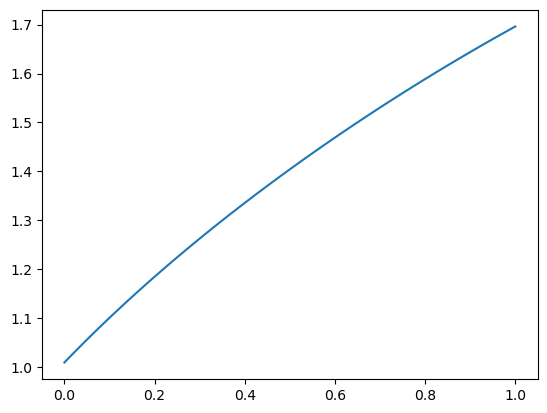

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def euler(f, y_init, a, b, h):
    n = int((b - a) // h)
    y = []
    y_n = y_init
    for i  in range(1, n+1):
        y_n = y_n + h * f(a + h * i, y_n)
        y.append(y_n)
    return y

def f(x, y):
    return y - 2 * x / y


a, b, h = 0, 1, 0.01
y = euler(f, 1, a, b, h)
n = int((b - a) // h)
x = np.linspace(a, b, n)
plt.plot(x, y )

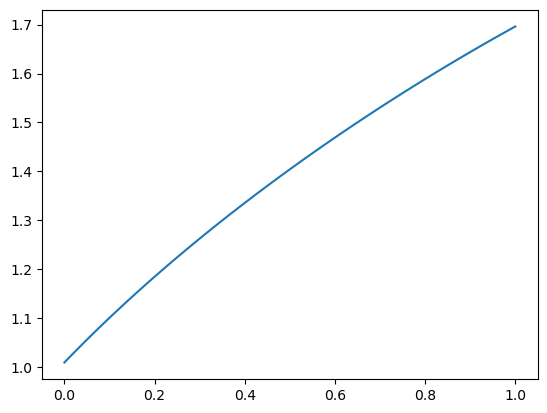

In [8]:
## 隐式欧拉

def euler_implict(f, y_init, a, b, h):
    n = int((b - a) // h)
    y = []
    y_explict = y_init
    for i  in range(1, n+1):
        # 这一步要找到一个合适的y_n
        y_implict = y_explict + h * f(a + h * i, y_explict)
        y_explict = y_implict
        while True:
            temp = y_implict + h * f(a + h * i, y_implict)
            if abs(temp - y_implict) < 1e-2:
                break
            y_implict = temp
        y.append(y_explict)
    return y

a, b, h = 0, 1, 0.01
y = euler_implict(f, 1, a, b, h)
n = int((b - a) // h)
x = np.linspace(a, b, n)
plt.plot(x, y )

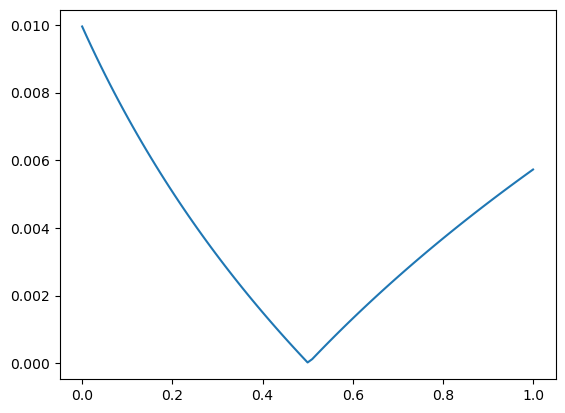

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def euler_modified(f, y_init, a, b, h):
    n = int((b - a) // h)
    y = []
    y_n = y_init
    for i  in range(1, n+1):
        t = f(a + h * (i-1), y_n)
        y_n = y_n + h / 2 * (t + f(a + h * i, y_n + h * t))
        y.append(y_n)
    return y

def f(x, y):
    return y - 2 * x / y


a, b, h = 0, 1, 0.01
y = euler_modified(f, 1, a, b, h)
n = int((b - a) // h)
x = np.linspace(a, b, n)
y_true = [(1+2*i)  ** 0.5 for i in x]


error = [abs(i[0] - i[1]) for i in zip(y_true, y)]
plt.plot(x, error)

#### 对于三种方法进行比较

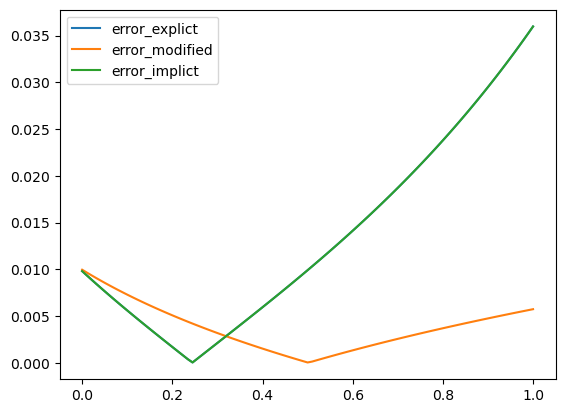

: 

In [16]:
a, b, h = 0, 1, 0.01
y_modified = euler_modified(f, 1, a, b, h)
y_implict = euler_implict(f, 1, a, b, h)
y_explict = euler(f, 1, a, b, h)
n = int((b - a) // h)
x = np.linspace(a, b, n)
y_true = [(1+2*i)  ** 0.5 for i in x]

error_modified = [abs(i[0] - i[1]) for i in zip(y_true, y_modified)]
error_implict = [abs(i[0] - i[1]) for i in zip(y_true, y_implict)]
error_explict = [abs(i[0] - i[1]) for i in zip(y_true, y_explict)]
plt.plot(x, error_explict, label='error_explict')
plt.plot(x, error_modified, label='error_modified')
plt.plot(x, error_implict, label='error_implict')
plt.legend()

In [ ]:
def runge_kutta(f, y_init, a, b, h):
    n = int((b - a) // h)
    y = []
    y_n = y_init
    for i  in range(1, n+1):
        y_n = y_n + h * f(a + h * i, y_n)
        # 求出k_1 k_2 k_3 k_4
        x_n = a + h * i
        k_1 = f(x_n, y_n)
        k_2 = f(x_n + h / 2, y_n + h / 2 * k_1)
        k_3 = f(x_n + h / 2, y_n + h /2 * k_2)
        k_4 = f(x_n + h , y_n + h * k_3)
        y.append(y_n)
    return y

def f(x, y):
    return y - 2 * x / y